In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## The source image


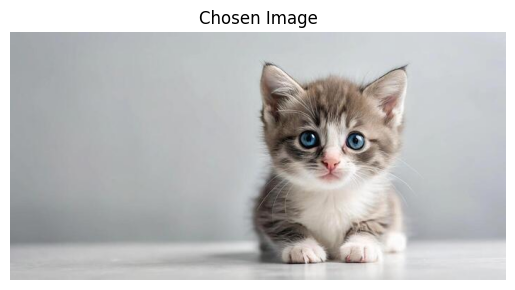

In [ ]:
img_bgr_original = cv2.imread("/content/cute-curious-gray-and-white-kitten-in-a-long-shot-photo.jpg")

img_rgb_original = cv2.cvtColor(img_bgr_original, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_original)
plt.title("Chosen Image")
plt.axis('off')
plt.show()

## RGB Histogram of the chosen image

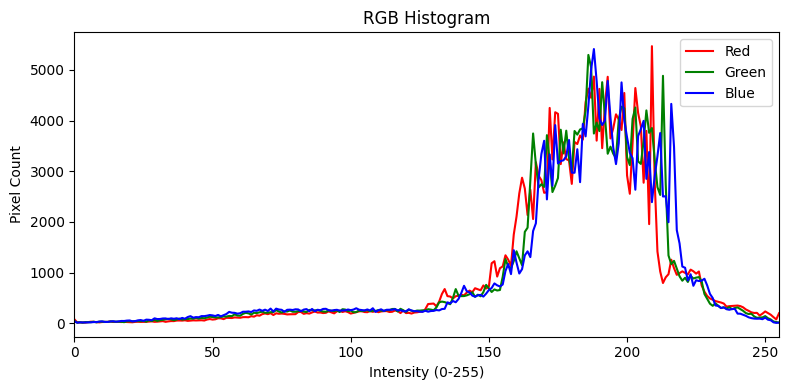

In [ ]:
plt.figure(figsize=(8,4))
colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']

for i, (c, lab) in enumerate(zip(colors, labels)):
    channel = img_rgb_original[:, :, i].ravel()
    hist, _ = np.histogram(channel, bins=256, range=(0, 256))
    plt.plot(hist, color=c, label=lab)

plt.title("RGB Histogram")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)
plt.legend()
plt.tight_layout()
plt.show()

## PDF for source image

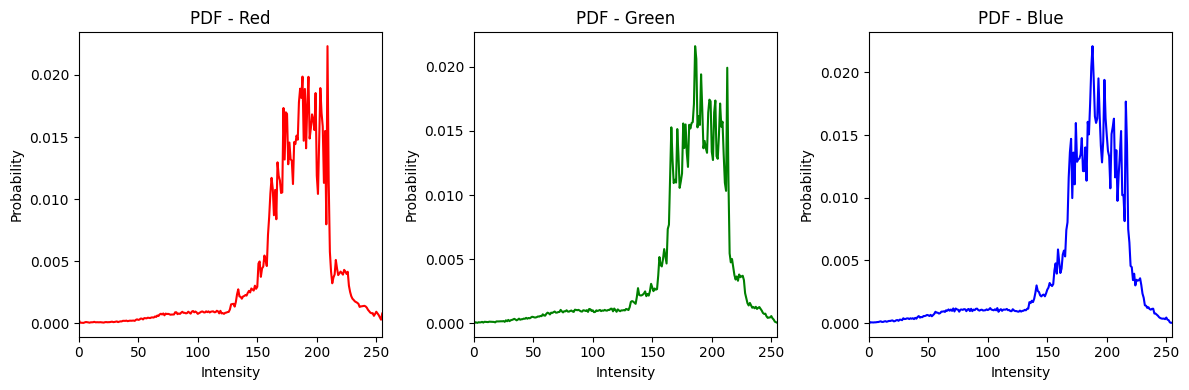

In [ ]:
img_rgb = cv2.cvtColor(img_bgr_original, cv2.COLOR_BGR2RGB)

bins = 256
rng = (0, 256)

# channels
R = img_rgb[:, :, 0].ravel()
G = img_rgb[:, :, 1].ravel()
B = img_rgb[:, :, 2].ravel()

# PDF
hist_R, _ = np.histogram(R, bins=bins, range=rng)
hist_G, _ = np.histogram(G, bins=bins, range=rng)
hist_B, _ = np.histogram(B, bins=bins, range=rng)

pdf_R = hist_R / R.size
pdf_G = hist_G / G.size
pdf_B = hist_B / B.size

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(pdf_R, 'r')
plt.title("PDF - Red")
plt.xlabel("Intensity")
plt.ylabel("Probability")
plt.xlim(0, 255)

plt.subplot(1, 3, 2)
plt.plot(pdf_G, 'g')
plt.title("PDF - Green")
plt.xlabel("Intensity")
plt.ylabel("Probability")
plt.xlim(0, 255)

plt.subplot(1, 3, 3)
plt.plot(pdf_B, 'b')
plt.title("PDF - Blue")
plt.xlabel("Intensity")
plt.ylabel("Probability")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

## CDF for source iamge

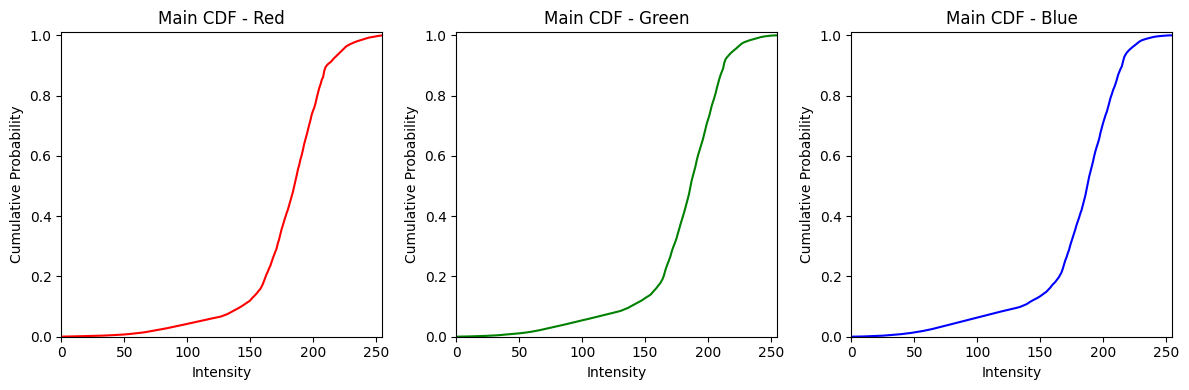

Last Main CDF R: 0.9999999999999997
Last Main CDF G: 1.0
Last Main CDF B: 1.0000000000000002


In [ ]:
cdf_R_src = np.cumsum(pdf_R)
cdf_G_src = np.cumsum(pdf_G)
cdf_B_src = np.cumsum(pdf_B)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(cdf_R_src, 'r')
plt.title("Main CDF - Red")
plt.xlabel("Intensity")
plt.ylabel("Cumulative Probability")
plt.xlim(0, 255)
plt.ylim(0, 1.01)

plt.subplot(1, 3, 2)
plt.plot(cdf_G_src, 'g')
plt.title("Main CDF - Green")
plt.xlabel("Intensity")
plt.ylabel("Cumulative Probability")
plt.xlim(0, 255)
plt.ylim(0, 1.01)

plt.subplot(1, 3, 3)
plt.plot(cdf_B_src, 'b')
plt.title("Main CDF - Blue")
plt.xlabel("Intensity")
plt.ylabel("Cumulative Probability")
plt.xlim(0, 255)
plt.ylim(0, 1.01)

plt.tight_layout()
plt.show()

print("Last Main CDF R:", cdf_R_src[-1])
print("Last Main CDF G:", cdf_G_src[-1])
print("Last Main CDF B:", cdf_B_src[-1])


## Histogram Equalization

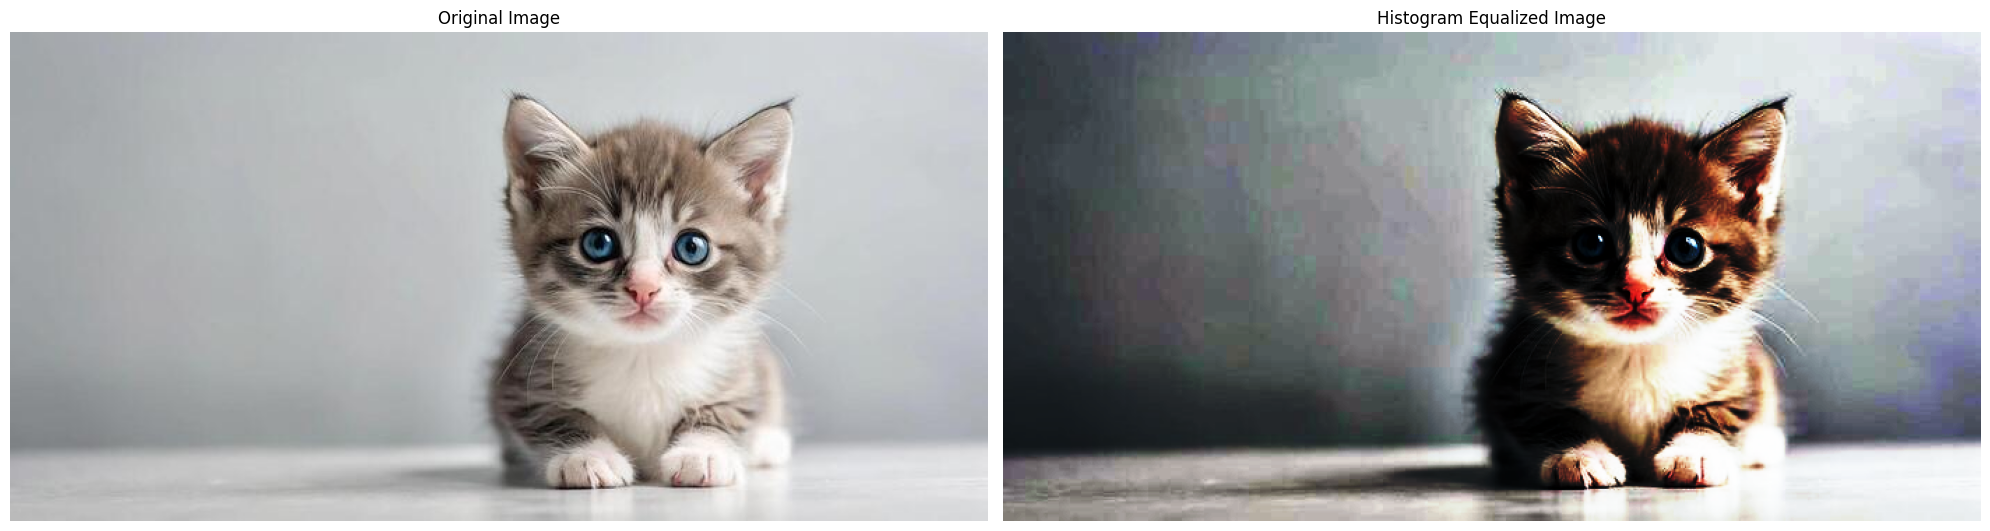

In [ ]:
eq_map_R = np.floor(255 * cdf_R_src).astype(np.uint8)
eq_map_G = np.floor(255 * cdf_G_src).astype(np.uint8)
eq_map_B = np.floor(255 * cdf_B_src).astype(np.uint8)

# applying mapping to each channel
R_eq = eq_map_R[img_rgb[:, :, 0]]
G_eq = eq_map_G[img_rgb[:, :, 1]]
B_eq = eq_map_B[img_rgb[:, :, 2]]

# merge channels
img_eq = np.stack((R_eq, G_eq, B_eq), axis=2)

plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_eq)
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()


## Reference Image

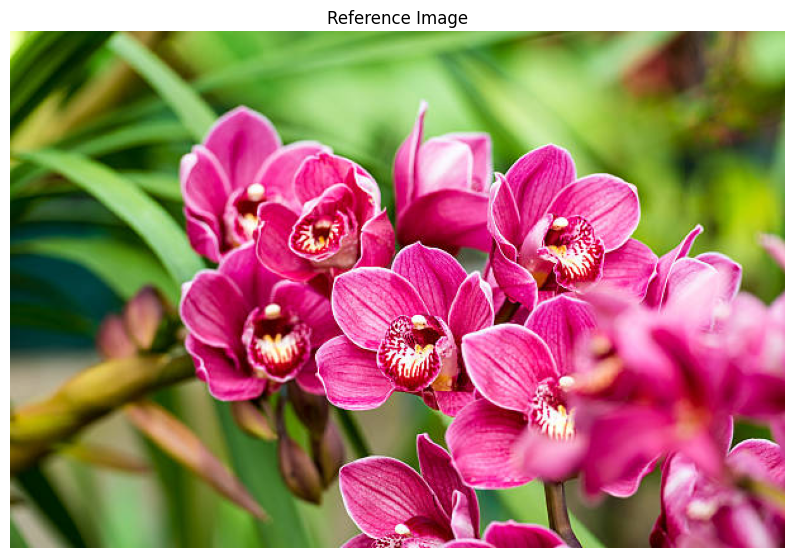

In [ ]:
ref_bgr = cv2.imread("/content/istockphoto-624627862-612x612.jpg")
ref_rgb = cv2.cvtColor(ref_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(ref_rgb)
plt.title("Reference Image")
plt.axis("off")
plt.show()


## PDF and CDF of reference image

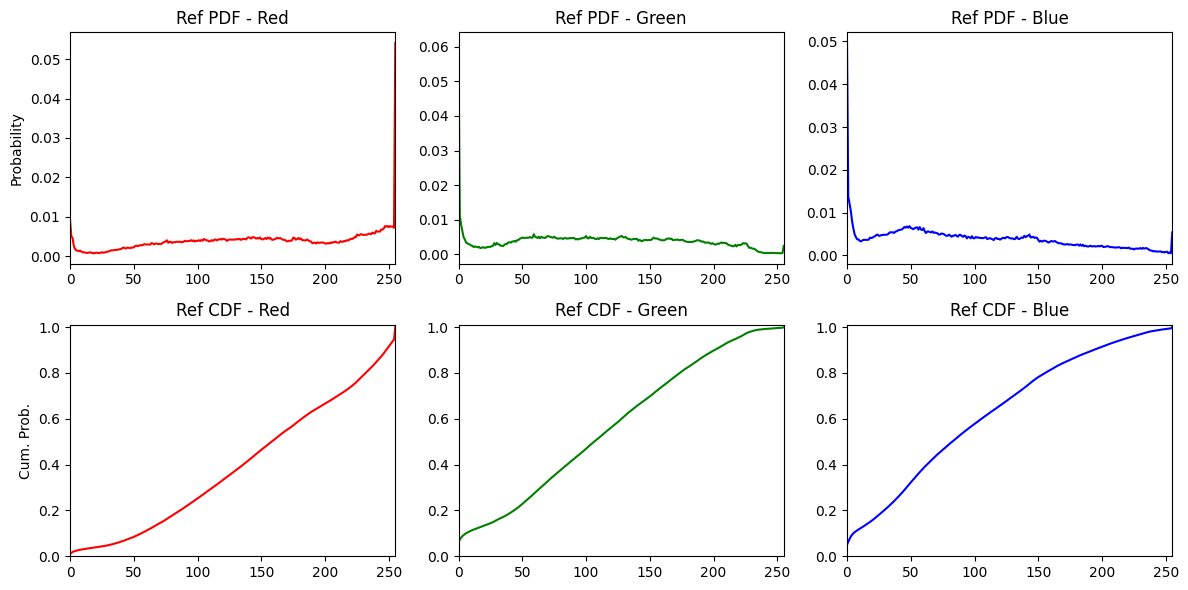

Last Ref CDF R: 1.0000000000000002
Last Ref CDF G: 1.0000000000000002
Last Ref CDF B: 1.0000000000000004


In [ ]:
bins = 256
rng = (0, 256)

# Splitting channels
R_ref = ref_rgb[:, :, 0].ravel()
G_ref = ref_rgb[:, :, 1].ravel()
B_ref = ref_rgb[:, :, 2].ravel()

# Histograms
hist_R_ref, _ = np.histogram(R_ref, bins=bins, range=rng)
hist_G_ref, _ = np.histogram(G_ref, bins=bins, range=rng)
hist_B_ref, _ = np.histogram(B_ref, bins=bins, range=rng)

# PDF
pdf_R_ref = hist_R_ref / R_ref.size
pdf_G_ref = hist_G_ref / G_ref.size
pdf_B_ref = hist_B_ref / B_ref.size

# CDF
cdf_R_ref = np.cumsum(pdf_R_ref)
cdf_G_ref = np.cumsum(pdf_G_ref)
cdf_B_ref = np.cumsum(pdf_B_ref)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1); plt.plot(pdf_R_ref, 'r'); plt.title("Ref PDF - Red");   plt.xlim(0,255); plt.ylabel("Probability")
plt.subplot(2, 3, 2); plt.plot(pdf_G_ref, 'g'); plt.title("Ref PDF - Green"); plt.xlim(0,255)
plt.subplot(2, 3, 3); plt.plot(pdf_B_ref, 'b'); plt.title("Ref PDF - Blue");  plt.xlim(0,255)

plt.subplot(2, 3, 4); plt.plot(cdf_R_ref, 'r'); plt.title("Ref CDF - Red");   plt.xlim(0,255); plt.ylim(0,1.01); plt.ylabel("Cum. Prob.")
plt.subplot(2, 3, 5); plt.plot(cdf_G_ref, 'g'); plt.title("Ref CDF - Green"); plt.xlim(0,255); plt.ylim(0,1.01)
plt.subplot(2, 3, 6); plt.plot(cdf_B_ref, 'b'); plt.title("Ref CDF - Blue");  plt.xlim(0,255); plt.ylim(0,1.01)

plt.tight_layout()
plt.show()

print("Last Ref CDF R:", cdf_R_ref[-1])
print("Last Ref CDF G:", cdf_G_ref[-1])
print("Last Ref CDF B:", cdf_B_ref[-1])


## Histogram matching and visualization

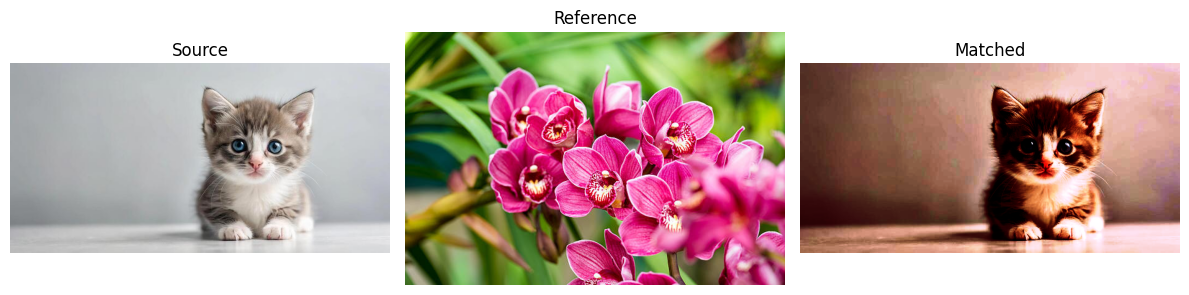

In [ ]:
# mapping
map_R = np.array([np.argmin(np.abs(cdf_R_ref - cdf_R_src[i])) for i in range(256)], dtype=np.uint8)
map_G = np.array([np.argmin(np.abs(cdf_G_ref - cdf_G_src[i])) for i in range(256)], dtype=np.uint8)
map_B = np.array([np.argmin(np.abs(cdf_B_ref - cdf_B_src[i])) for i in range(256)], dtype=np.uint8)

# applying mapping to the source image
matched = img_rgb.copy()
matched[:, :, 0] = map_R[img_rgb[:, :, 0]]
matched[:, :, 1] = map_G[img_rgb[:, :, 1]]
matched[:, :, 2] = map_B[img_rgb[:, :, 2]]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title("Source"); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(ref_rgb); plt.title("Reference"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(matched); plt.title("Matched"); plt.axis("off")
plt.tight_layout()
plt.show()

## Matched image histogram (combine plot)

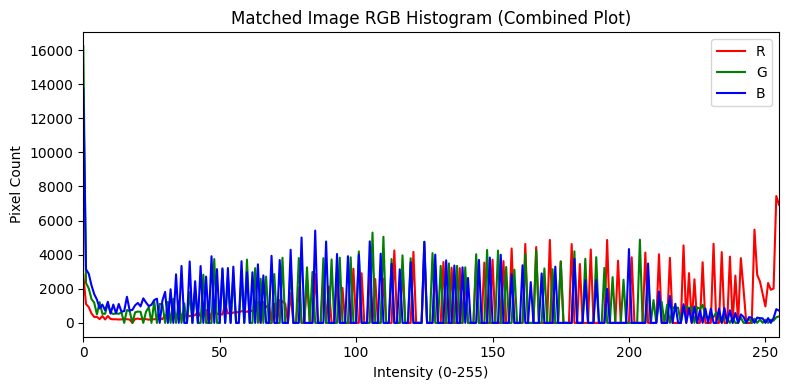

In [ ]:
bins = 256
rng = (0, 256)

hist_R, _ = np.histogram(matched[:, :, 0].ravel(), bins=bins, range=rng)
hist_G, _ = np.histogram(matched[:, :, 1].ravel(), bins=bins, range=rng)
hist_B, _ = np.histogram(matched[:, :, 2].ravel(), bins=bins, range=rng)

plt.figure(figsize=(8,4))
plt.plot(hist_R, 'r', label='R')
plt.plot(hist_G, 'g', label='G')
plt.plot(hist_B, 'b', label='B')
plt.title("Matched Image RGB Histogram (Combined Plot)")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)
plt.legend()
plt.tight_layout()
plt.show()


## Matched image histogram (For Seperate R B G)

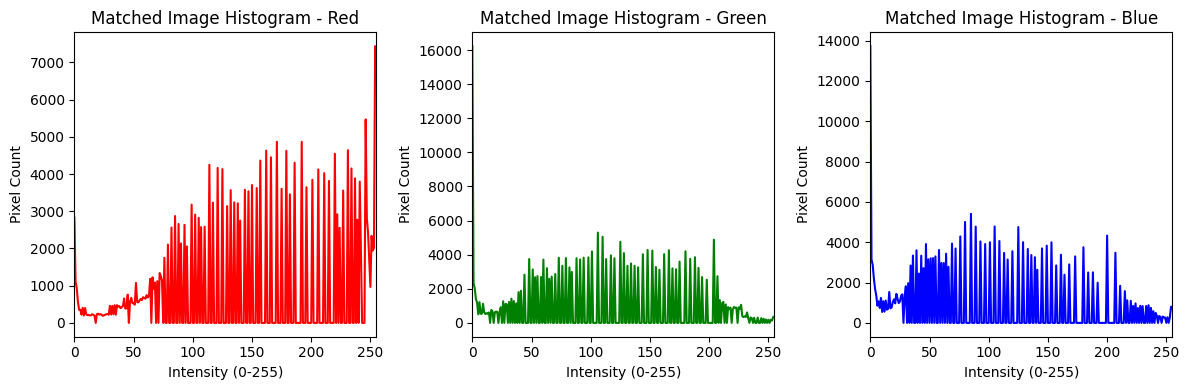

In [ ]:
R = matched[:, :, 0].ravel()
G = matched[:, :, 1].ravel()
B = matched[:, :, 2].ravel()

bins = 256
rng = (0, 256)

hist_R, _ = np.histogram(R, bins=bins, range=rng)
hist_G, _ = np.histogram(G, bins=bins, range=rng)
hist_B, _ = np.histogram(B, bins=bins, range=rng)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(hist_R, 'r')
plt.title("Matched Image Histogram - Red")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)

plt.subplot(1, 3, 2)
plt.plot(hist_G, 'g')
plt.title("Matched Image Histogram - Green")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)

plt.subplot(1, 3, 3)
plt.plot(hist_B, 'b')
plt.title("Matched Image Histogram - Blue")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()


# **Finally the matched image looks like this,**

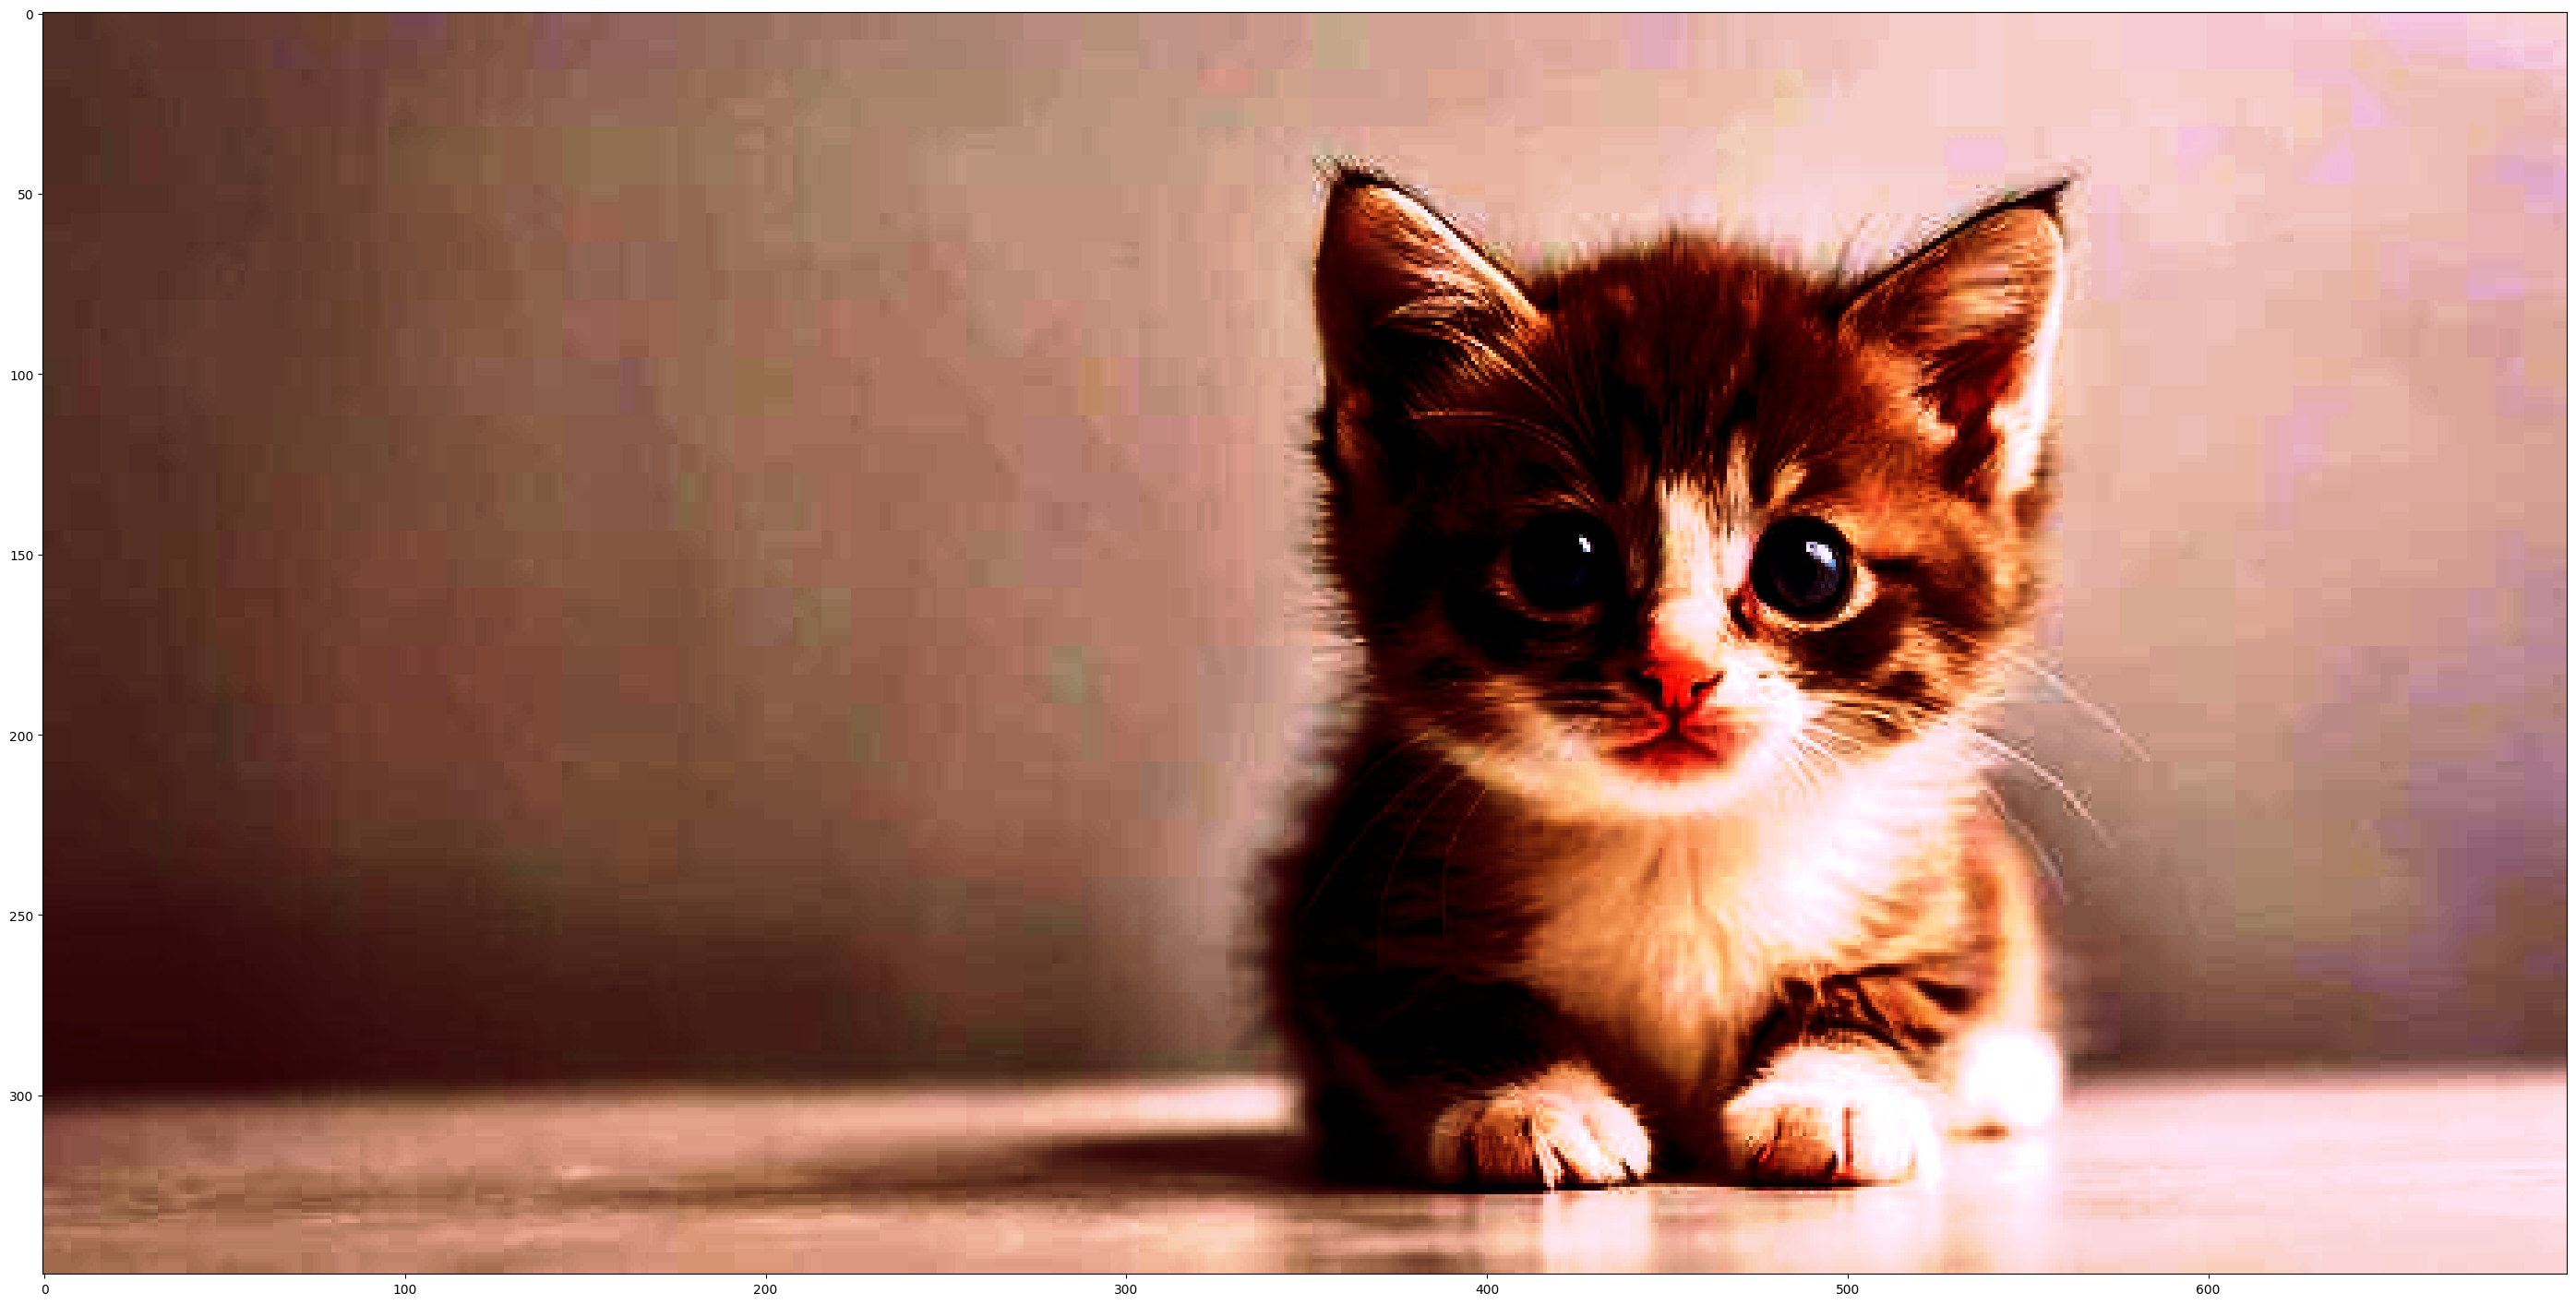

In [ ]:
plt.figure(figsize=(120, 40))
plt.subplot(1, 3, 3); plt.imshow(matched)